In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Central Limit Theorem

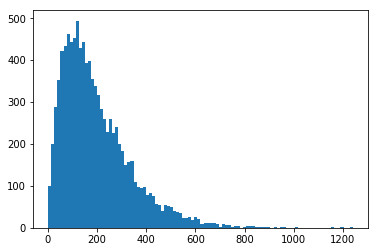

In [23]:
dist = np.random.gamma(2, 100, 10000)
plt.hist(dist, bins=100);

In [11]:
def random_select(dist, n):
    return np.mean(np.random.choice(dist, n, replace=True))   # mean of bootstrap sampling

dist_mean_1 = [random_select(dist, 1) for i in range(1000)]
dist_mean_10 = [random_select(dist, 10) for i in range(1000)]
dist_mean_100 = [random_select(dist, 100) for i in range(1000)]

200.87992713676235
206.67662950417557 199.14790445316106 201.10933066302974


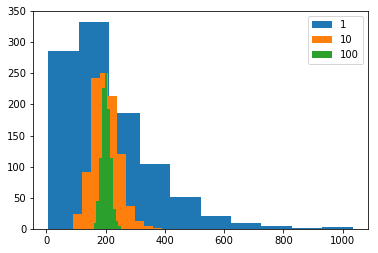

In [19]:
plt.hist(dist_mean_1, label='1')
plt.hist(dist_mean_10, label='10')
plt.hist(dist_mean_100, label='100')
plt.legend()
print(np.mean(dist))
print(np.mean(dist_mean_1), np.mean(dist_mean_10), np.mean(dist_mean_100))

In [20]:
print(np.std(dist))
print(np.std(dist_mean_1), np.std(dist_mean_10), np.std(dist_mean_100))

143.71192959816625
148.7132496489613 43.832325376202675 14.225642668363623


In [21]:
print(np.std(dist)/np.sqrt(1), np.std(dist)/np.sqrt(10), np.std(dist)/np.sqrt(100))

143.71192959816625 45.4457024467972 14.371192959816625


- **Mean( of distribution of sample mean) = Mean (population)**
- **std( of distribution of sample mean) = std (population) / np.sqrt(n)   -> n=sample per bundle**

## Proportion

In [24]:
np.random.seed(42)

students = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0])

In [26]:
p = sum(students)/len(students)  # population proportion

In [32]:
p

0.7142857142857143

In [27]:
var_pop = p * (1.0 - p) # population variance

In [28]:
var_pop

0.20408163265306123

In [29]:
sample_mean_5 = [random_select(students, 5) for i in range(1000)]

In [33]:
np.mean(sample_mean_5)    # mean of distribution of sampling mean == p

0.7212000000000001

In [34]:
np.std(sample_mean_5)  # std of distribution of sampling mean

0.2002762092710964

In [35]:
np.sqrt(var_pop / 5)

0.20203050891044216

In [37]:
np.round(np.sqrt(var_pop / 5),2) == np.round(np.std(sample_mean_5),2)

True

- **Mean( of distribution of sample mean) = Mean (population)**
- **std( of distribution of sample mean) = std (population) / np.sqrt(n)   -> n=sample per bundle**

## Difference in Mean

In [39]:
np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')

In [40]:
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [41]:
coffee_small_sample = coffee_full.sample(200)  # what av

In [42]:
coffee_small_sample.shape

(200, 4)

In [44]:
coffee_small_sample.height.mean()

67.57907352931672

In [49]:
height_drink = coffee_small_sample[coffee_small_sample.drinks_coffee == True]['height'].mean()  # drink coffee heigh

In [50]:
height_not_drink = coffee_small_sample[coffee_small_sample.drinks_coffee == False]['height'].mean()  # not drink coffee heigh

In [52]:
delta = height_drink - height_not_drink  
delta  # coffee drinker shorter or different

1.334707109307402

In [90]:
# boostrap for overall height and heigh based on coffee
overall_mean_dist = []
delta_mean_dist = []
drink_dist = []
nodrink_dist = []

for i in range(10000):
    temp = coffee_small_sample.sample(200, replace=True)  # small is what we have aviable not the full data in real life
    overall_mean_dist.append(temp['height'].mean())
    drink_ = temp[temp.drinks_coffee == True]['height'].mean() # proportion 1
    drink_dist.append(drink_)
    nodrink_ = temp[temp.drinks_coffee == False]['height'].mean() # proportion2
    nodrink_dist.append(nodrink_)
    delta_ = drink_ - nodrink_
    delta_mean_dist.append(delta_)   # delta in proportion for each case
   

## Poulation proportion difference

In [91]:
np.var(drink_dist)

0.06104815147201216

In [92]:
np.var(nodrink_dist)

0.16309134216814827

In [93]:
np.var(delta_mean_dist)

0.22148566373771336

### Var(delta in proportion) = Var(proportion1) + Var(proportion2) 
each built from distribution of proportions, and distribution of delta of proportions

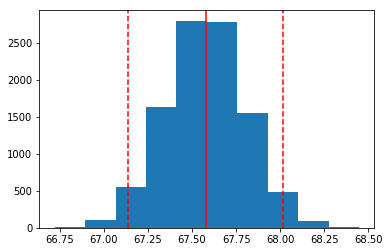

In [77]:
plt.hist(overall_mean_dist)  # 
plt.axvline(67.57907352931672, c='red')
plt.axvline(np.percentile(overall_mean_dist, 2.5), c='red',linestyle ='--')
plt.axvline(np.percentile(overall_mean_dist, 97.5), c='red',linestyle ='--')

## "No difference" is beyond the confidence interval of distribution
## confidence interval does not contain 0.0 (0.0 not probable event)

0.39857010599322823 2.2332009577772722


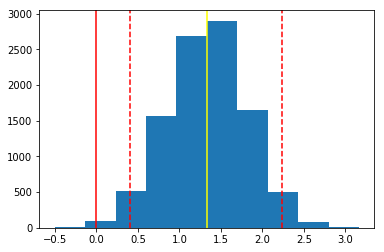

In [78]:
plt.hist(delta_mean_dist)  # 
plt.axvline(0.0, c='red')
plt.axvline(1.33, c='yellow')
plt.axvline(np.percentile(delta_mean_dist, 2.5), c='red',linestyle ='--')
plt.axvline(np.percentile(delta_mean_dist, 97.5), c='red',linestyle ='--')  # seems that coffee drinkers are taller
# since 0.0 (no difference) is not in our confidence interval
print(np.percentile(delta_mean_dist, 2.5), np.percentile(delta_mean_dist, 97.5))


In [79]:
import statsmodels.stats.api as sms

X1 = coffee_small_sample[coffee_small_sample['drinks_coffee'] == True]['height'] 
X2 = coffee_small_sample[coffee_small_sample['drinks_coffee'] == False]['height']

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
cm.tconfint_diff(usevar='unequal')

(0.39600106159185644, 2.273413157022891)

In [82]:
std_delta = np.std(delta_mean_dist)
std_delta

0.47071690105447234

In [84]:
normal_null_hypothesis = np.random.normal(0.0, std_delta, 10000)

In [111]:
#if H0 <= 0, H1>0
(normal_null_hypothesis > delta).mean() *100  # one tail

0.24

## Below shows that delta of 1.33 is beyond our null hypothesis
### Reject Null (reject no difference)

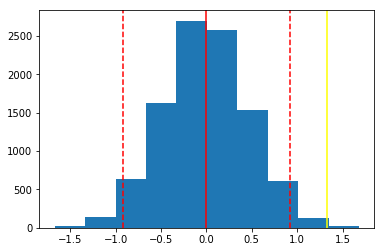

In [108]:
plt.hist(normal_null_hypothesis)
plt.axvline(0.0, c='red')
plt.axvline(1.33, c='yellow')
plt.axvline(np.percentile(normal_null_hypothesis, 2.5), c='red',linestyle ='--')
plt.axvline(np.percentile(normal_null_hypothesis, 97.5), c='red',linestyle ='--')

In [96]:
coffee_small_sample[coffee_small_sample['age'] == '<21'].count()

user_id          94
age              94
drinks_coffee    94
height           94
dtype: int64

In [97]:
coffee_small_sample[coffee_small_sample['age'] == '>=21'].count()

user_id          106
age              106
drinks_coffee    106
height           106
dtype: int64

In [98]:
coffee_small_sample['age'].value_counts()

>=21    106
<21      94
Name: age, dtype: int64

In [99]:
coffee_full['age'].value_counts()

>=21    1644
<21     1330
Name: age, dtype: int64

In [100]:
coffee_full.groupby(by=['age'])['height'].mean()

age
<21     65.451392
>=21    69.333683
Name: height, dtype: float64

In [102]:
coffee_full.groupby(by=['drinks_coffee'])['height'].mean()

drinks_coffee
False    66.443408
True     68.400210
Name: height, dtype: float64

In [103]:
coffee_full.groupby(by=['age', 'drinks_coffee'])['height'].mean()  # in each age group no-coffee is taller 
# the more sample of over 21 that are taller corrupted the analysis and into thinking coffee make you taller
# simposon paradox: another varibale that not accounted for driving the conclusion (on even invariant)

age   drinks_coffee
<21   False            65.784881
      True             64.085491
>=21  False            71.105427
      True             69.154491
Name: height, dtype: float64